# 1. Preparación

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos desde el archivo CSV
df_compas_2y = pd.read_csv("https://raw.githubusercontent.com/MangelFdz/nuclio_g3_bias/13a4a83170a1103c7e32a9a5f46a819db8c5b7d5/users/Emilio/compas-scores-two-years.csv", delimiter=',')


In [3]:
df_compas_2y_info = df_compas_2y.info()
df_compas_2y_head = df_compas_2y.head()

df_compas_2y_info, df_compas_2y_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

(None,
    id                name   first         last compas_screening_date   sex  \
 0   1    miguel hernandez  miguel    hernandez            2013-08-14  Male   
 1   3         kevon dixon   kevon        dixon            2013-01-27  Male   
 2   4            ed philo      ed        philo            2013-04-14  Male   
 3   5         marcu brown   marcu        brown            2013-01-13  Male   
 4   6  bouthy pierrelouis  bouthy  pierrelouis            2013-03-26  Male   
 
           dob  age          age_cat              race  ...  v_decile_score  \
 0  1947-04-18   69  Greater than 45             Other  ...               1   
 1  1982-01-22   34          25 - 45  African-American  ...               1   
 2  1991-05-14   24     Less than 25  African-American  ...               3   
 3  1993-01-21   23     Less than 25  African-American  ...               6   
 4  1973-01-22   43          25 - 45             Other  ...               1   
 
    v_score_text  v_screening_date  in_cu

In [4]:
# Eliminar filas con valores nulos en las columnas clave
df_compas_2y_clean = df_compas_2y.dropna(subset=['decile_score', 'race', 'sex', 'priors_count', 'age', 'c_charge_degree'])

# Verificar si quedan nulos
df_compas_2y_clean.isnull().sum()

id                            0
name                          0
first                         0
last                          0
compas_screening_date         0
sex                           0
dob                           0
age                           0
age_cat                       0
race                          0
juv_fel_count                 0
decile_score                  0
juv_misd_count                0
juv_other_count               0
priors_count                  0
days_b_screening_arrest     307
c_jail_in                   307
c_jail_out                  307
c_case_number                22
c_offense_date             1159
c_arrest_date              6077
c_days_from_compas           22
c_charge_degree               0
c_charge_desc                29
is_recid                      0
r_case_number              3743
r_charge_degree            3743
r_days_from_arrest         4898
r_offense_date             3743
r_charge_desc              3801
r_jail_in                  4898
r_jail_o

# 2 Análisis exploratorio de las variables

### 2.1 Distribución de decile_score por raza y sexo

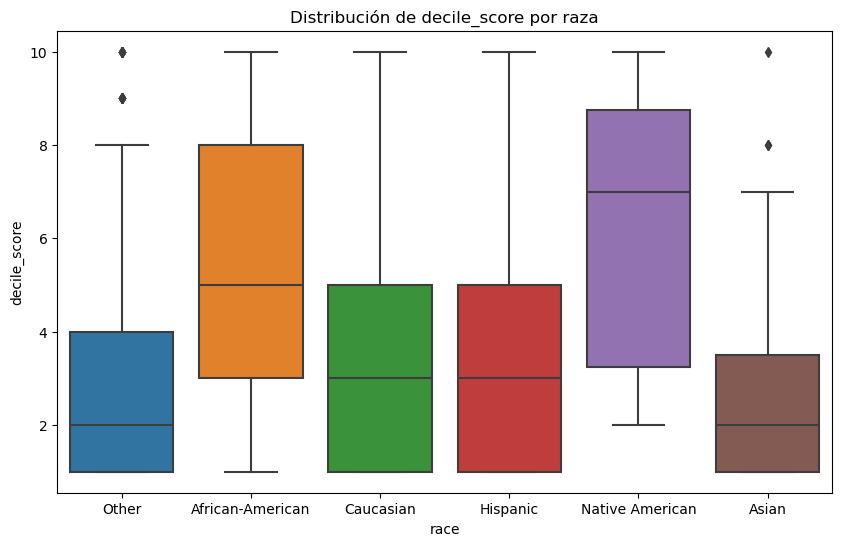

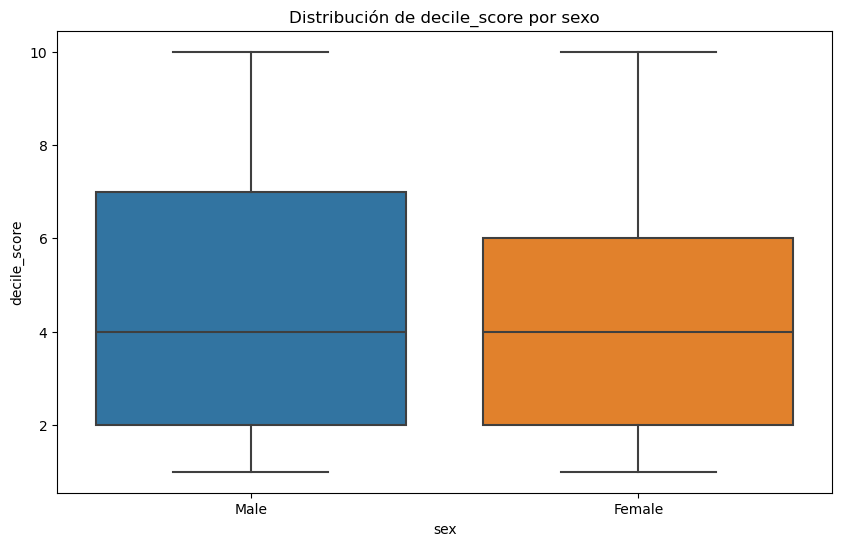

In [5]:
# Visualización de la puntuación decile_score por raza
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_compas_2y_clean, x='race', y='decile_score')
plt.title('Distribución de decile_score por raza')
plt.show()

# Visualización de la puntuación decile_score por sexo
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_compas_2y_clean, x='sex', y='decile_score')
plt.title('Distribución de decile_score por sexo')
plt.show()

### 2.2 Distribución cruzada por raza, sexo y otras variables (p. ej., priors_count, age)

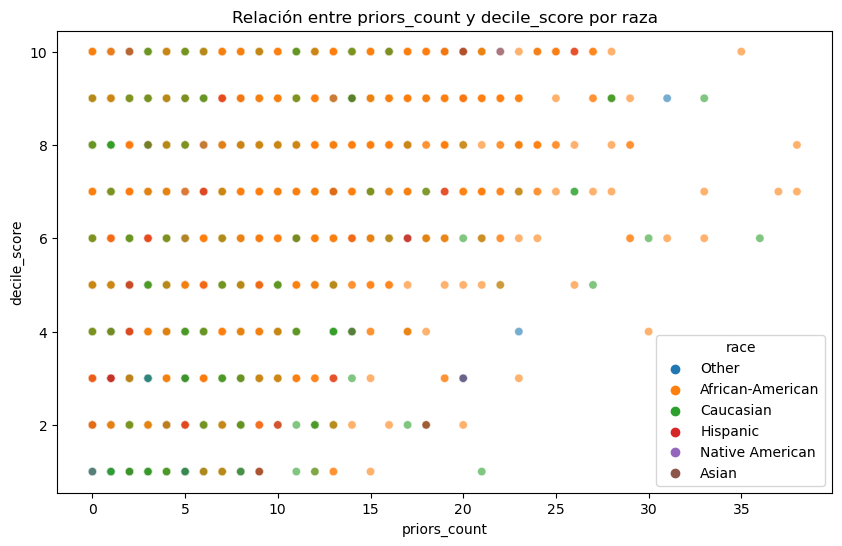

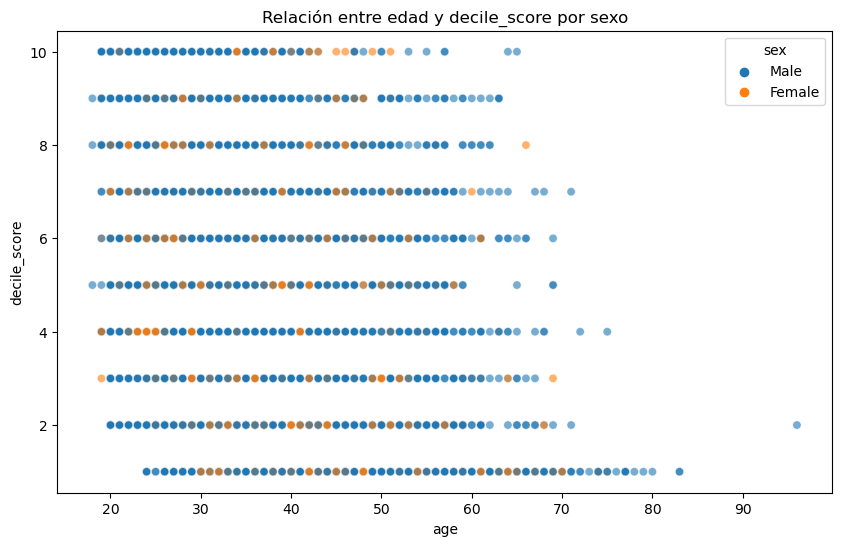

In [6]:
# Distribución de decile_score según raza y número de delitos anteriores (priors_count)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_compas_2y_clean, x='priors_count', y='decile_score', hue='race', alpha=0.6)
plt.title('Relación entre priors_count y decile_score por raza')
plt.show()

# Distribución de decile_score según edad y sexo
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_compas_2y_clean, x='age', y='decile_score', hue='sex', alpha=0.6)
plt.title('Relación entre edad y decile_score por sexo')
plt.show()

 # 3 Análisis del sesgo potencial (Raza y Sesgo)

### 3.1 ANOVA

In [7]:
# Importar librería para ANOVA
from scipy import stats

# ANOVA de decile_score por raza
anova_race = stats.f_oneway(
    df_compas_2y_clean[df_compas_2y_clean['race'] == 'African-American']['decile_score'],
    df_compas_2y_clean[df_compas_2y_clean['race'] == 'Caucasian']['decile_score'],
    df_compas_2y_clean[df_compas_2y_clean['race'] == 'Hispanic']['decile_score'],
    df_compas_2y_clean[df_compas_2y_clean['race'] == 'Other']['decile_score'],
    df_compas_2y_clean[df_compas_2y_clean['race'] == 'Asian']['decile_score'],
)
# Resultados del ANOVA por raza
print('ANOVA por raza:', anova_race)

# ANOVA de decile_score por sexo
anova_sex = stats.f_oneway(
    df_compas_2y_clean[df_compas_2y_clean['sex'] == 'Male']['decile_score'],
    df_compas_2y_clean[df_compas_2y_clean['sex'] == 'Female']['decile_score'])

# Resultados del ANOVA por sexo
print('ANOVA por sexo:', anova_sex)


ANOVA por raza: F_onewayResult(statistic=200.85635772988653, pvalue=1.490825659458897e-163)
ANOVA por sexo: F_onewayResult(statistic=24.225059388282197, pvalue=8.761177471148196e-07)


###
Los resultados del ANOVA reflejan cómo las puntuaciones de Compas (decile_score) varían según la raza y el sexo. Vamos a interpretarlos uno por uno:

1. ANOVA por raza

F-statistic = 200.86: El estadístico F mide la variación entre las medias de las puntuaciones de Compas entre los diferentes grupos raciales en comparación con la variación dentro de esos grupos. Un valor de F elevado, como este, indica que las diferencias entre los grupos raciales en cuanto a las puntuaciones de Compas son mucho mayores que la variación dentro de los grupos.

p-value = 1.49e-163: Este p-value es extremadamente pequeño, prácticamente cero, lo que significa que las diferencias observadas entre las puntuaciones de Compas para los distintos grupos raciales son altamente significativas. En un análisis estadístico, si el p-value es menor que un nivel de significancia comúnmente utilizado (como 0.05), rechazamos la hipótesis nula, que en este caso sería que no hay diferencias entre las medias de las puntuaciones de Compas entre los grupos raciales.

Conclusión: La prueba ANOVA indica que hay una diferencia estadísticamente significativa en las puntuaciones de Compas entre las distintas razas. Esto sugiere que la raza es un factor importante que afecta la puntuación en el sistema Compas, lo que podría ser una señal de sesgo racial.

2. ANOVA por sexo

F-statistic = 24.23: Aunque este valor de F es considerablemente menor que el obtenido para la raza, sigue siendo suficientemente elevado como para sugerir diferencias significativas en las puntuaciones de Compas entre hombres y mujeres.

p-value = 8.76e-07: El p-value es muy pequeño, lo que también indica una diferencia significativa entre las puntuaciones de Compas por género. Nuevamente, este valor es mucho menor que 0.05, lo que nos lleva a rechazar la hipótesis nula de que no hay diferencias entre las medias de las puntuaciones de Compas para hombres y mujeres.

Conclusión: La prueba ANOVA por sexo también sugiere que existe una diferencia significativa en las puntuaciones de Compas entre hombres y mujeres, lo que podría ser un indicio de sesgo de género en la asignación de las puntuaciones.

Interpretación General

Los resultados de ambas pruebas ANOVA muestran diferencias significativas en las puntuaciones de Compas tanto por raza como por sexo. Esto podría indicar que el algoritmo de Compas está afectado por sesgos sistemáticos que asignan diferentes puntuaciones de riesgo según la raza y el género de los individuos.

Sesgo racial: Las diferencias más marcadas (alto valor F y p-value extremadamente bajo) sugieren que la raza es un factor importante en la variación de las puntuaciones de Compas, lo que podría reflejar sesgo racial en el sistema.

Sesgo de género: Aunque las diferencias por sexo son menores en comparación con las diferencias por raza, siguen siendo estadísticamente significativas, lo que indica que el género también podría influir en las puntuaciones de riesgo asignadas.


In [8]:
print(df_compas_2y_clean.columns)

Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'sex', 'dob',
       'age', 'age_cat', 'race', 'juv_fel_count', 'decile_score',
       'juv_misd_count', 'juv_other_count', 'priors_count',
       'days_b_screening_arrest', 'c_jail_in', 'c_jail_out', 'c_case_number',
       'c_offense_date', 'c_arrest_date', 'c_days_from_compas',
       'c_charge_degree', 'c_charge_desc', 'is_recid', 'r_case_number',
       'r_charge_degree', 'r_days_from_arrest', 'r_offense_date',
       'r_charge_desc', 'r_jail_in', 'r_jail_out', 'violent_recid',
       'is_violent_recid', 'vr_case_number', 'vr_charge_degree',
       'vr_offense_date', 'vr_charge_desc', 'type_of_assessment',
       'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid'],
      dtype='object')


### 3.2 Modelo de Regresión Lineal

##### Usaremos una regresión lineal para evaluar cómo la raza, el sexo, y otras variables como el número de delitos previos y la edad afectan la puntuación de Compas.

In [9]:
# Crear variables dummy para las columnas 'race' y 'sex' sin eliminar ninguna categoría

df_compas_2y_clean = pd.get_dummies(df_compas_2y_clean, columns=['race', 'sex'], drop_first=False)
# Verificar las nuevas columnas creadas

print(df_compas_2y_clean.columns)


Index(['id', 'name', 'first', 'last', 'compas_screening_date', 'dob', 'age',
       'age_cat', 'juv_fel_count', 'decile_score', 'juv_misd_count',
       'juv_other_count', 'priors_count', 'days_b_screening_arrest',
       'c_jail_in', 'c_jail_out', 'c_case_number', 'c_offense_date',
       'c_arrest_date', 'c_days_from_compas', 'c_charge_degree',
       'c_charge_desc', 'is_recid', 'r_case_number', 'r_charge_degree',
       'r_days_from_arrest', 'r_offense_date', 'r_charge_desc', 'r_jail_in',
       'r_jail_out', 'violent_recid', 'is_violent_recid', 'vr_case_number',
       'vr_charge_degree', 'vr_offense_date', 'vr_charge_desc',
       'type_of_assessment', 'decile_score.1', 'score_text', 'screening_date',
       'v_type_of_assessment', 'v_decile_score', 'v_score_text',
       'v_screening_date', 'in_custody', 'out_custody', 'priors_count.1',
       'start', 'end', 'event', 'two_year_recid', 'race_African-American',
       'race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Native 

In [10]:
# Eliminar 'race_Caucasian' para que sea la categoría de referencia
df_compas_2y_clean = df_compas_2y_clean.drop(columns=['race_Caucasian'])

# Eliminar la columna 'sex_Female' para que sea la categoría de referencia
df_compas_2y_clean = df_compas_2y_clean.drop(columns=['sex_Female'])

In [11]:
# Verificar los tipos de datos de las columnas
print(df_compas_2y_clean.dtypes)

id                           int64
name                        object
first                       object
last                        object
compas_screening_date       object
dob                         object
age                          int64
age_cat                     object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_case_number               object
c_offense_date              object
c_arrest_date               object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc               object
is_recid                     int64
r_case_number               object
r_charge_degree             object
r_days_from_arrest         float64
r_offense_date              object
r_charge_desc               object
r_jail_in           

In [12]:
# Eliminar filas con valores nulos en las columnas que vas a usar
df_compas_2y_clean = df_compas_2y_clean.dropna(subset=['age', 'priors_count', 'race_African-American', 'race_Asian', 'race_Hispanic', 'race_Other', 'race_Native American', 'sex_Male', 'decile_score'])

In [13]:
# Verificar si hay valores nulos en las columnas importantes
print(df_compas_2y_clean[['age', 'priors_count', 'decile_score', 'race_African-American', 'race_Asian', 'race_Hispanic', 'race_Other', 'race_Native American', 'sex_Male']].isnull().sum())

age                      0
priors_count             0
decile_score             0
race_African-American    0
race_Asian               0
race_Hispanic            0
race_Other               0
race_Native American     0
sex_Male                 0
dtype: int64


In [14]:
# Convertir las columnas booleanas a enteros (0/1)
df_compas_2y_clean['race_African-American'] = df_compas_2y_clean['race_African-American'].astype(int)
df_compas_2y_clean['race_Asian'] = df_compas_2y_clean['race_Asian'].astype(int)
df_compas_2y_clean['race_Hispanic'] = df_compas_2y_clean['race_Hispanic'].astype(int)
df_compas_2y_clean['race_Other'] = df_compas_2y_clean['race_Other'].astype(int)
df_compas_2y_clean['race_Native American'] = df_compas_2y_clean['race_Native American'].astype(int)
df_compas_2y_clean['sex_Male'] = df_compas_2y_clean['sex_Male'].astype(int)

In [15]:
print(df_compas_2y_clean.dtypes)

id                           int64
name                        object
first                       object
last                        object
compas_screening_date       object
dob                         object
age                          int64
age_cat                     object
juv_fel_count                int64
decile_score                 int64
juv_misd_count               int64
juv_other_count              int64
priors_count                 int64
days_b_screening_arrest    float64
c_jail_in                   object
c_jail_out                  object
c_case_number               object
c_offense_date              object
c_arrest_date               object
c_days_from_compas         float64
c_charge_degree             object
c_charge_desc               object
is_recid                     int64
r_case_number               object
r_charge_degree             object
r_days_from_arrest         float64
r_offense_date              object
r_charge_desc               object
r_jail_in           

In [16]:
import statsmodels.api as sm

# Definir variables independientes (con 'sex_Male' y las dummies de raza)
X = df_compas_2y_clean[['age', 'priors_count', 'race_African-American', 'race_Asian', 'race_Hispanic', 'race_Other', 'race_Native American', 'sex_Male']]
y = df_compas_2y_clean['decile_score']

# Añadir constante (intercepto) al modelo
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           decile_score   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     648.4
Date:                Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                        19:41:27   Log-Likelihood:                -15851.
No. Observations:                7214   AIC:                         3.172e+04
Df Residuals:                    7205   BIC:                         3.178e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     6.97

##### Nota:
###### La razón por la que no se generó una columna como 'race_African-American' cuando aplicaste pd.get_dummies() (o sex_Female en Sexo) es porque el parámetro drop_first=True elimina una de las categorías para evitar la multicolinealidad en el modelo.

#### Interpretación de los Resultados de la Regresión:

1. R-squared (R²):
R-squared = 0.419: El valor de R² indica qué proporción de la variabilidad en la variable dependiente (en este caso, la puntuación de riesgo de reincidencia, decile_score) es explicada por las variables independientes del modelo. Un R² de 0.419 significa que el 41.9% de la variabilidad en las puntuaciones de Compas es explicada por las variables del modelo.
Adj. R-squared = 0.418: El valor ajustado de R² es muy cercano a R², lo que indica que el modelo es relativamente estable y no se está sobreajustando a los datos.

2. F-statistic y Prob(F-statistic):
F-statistic = 648.4 con un p-valor prácticamente 0: Esto significa que el modelo general es estadísticamente significativo, lo que implica que al menos una de las variables independientes tiene un impacto significativo en la variable dependiente (decile_score).

3. Coeficientes e Interpretación Individual de las Variables:
Constante (const): El coeficiente de la constante es 6.9742, lo que indica el valor promedio de decile_score cuando todas las variables independientes son iguales a 0.

Edad (age): El coeficiente es -0.1043, lo que significa que por cada año adicional de edad, la puntuación de riesgo en Compas disminuye en promedio en 0.1043 puntos. El p-valor es 0.000, lo que indica que la relación entre la edad y la puntuación de riesgo es altamente significativa.

Priors Count (priors_count): El coeficiente es 0.2731, lo que sugiere que por cada delito previo adicional, la puntuación de riesgo en Compas aumenta en 0.2731 puntos, con un p-valor de 0.000, lo que indica una relación significativa.

Raza:

Africanos Americanos: El coeficiente es 0.6089, lo que significa que, en promedio, los individuos afroamericanos tienen puntuaciones de riesgo 0.6089 puntos más altas que los individuos de referencia (probablemente los caucásicos). Esta diferencia es significativa (p-valor = 0.000).

Asiáticos: El coeficiente es -0.4756, lo que indica que los individuos asiáticos tienen una puntuación de riesgo 0.4756 puntos menor que los caucásicos, aunque esta relación no es significativa (p-valor = 0.220).

Hispanos: El coeficiente es -0.4166, lo que significa que los individuos hispanos tienen una puntuación de riesgo 0.4166 puntos menor que los caucásicos, y esta diferencia es significativa (p-valor = 0.000).

Otras Razas: El coeficiente es -0.8734, lo que indica una puntuación de riesgo significativamente más baja para individuos de otras razas en comparación con los caucásicos (p-valor = 0.000).

Nativos Americanos: El coeficiente es 0.9952, lo que sugiere que los nativos americanos tienen puntuaciones de riesgo 0.9952 puntos más altas en promedio que los caucásicos. Sin embargo, este resultado es solo marginalmente significativo (p-valor = 0.054).

Sexo (sex_Male): El coeficiente es -0.0149, lo que sugiere que no hay una diferencia significativa en las puntuaciones de riesgo entre hombres y mujeres (p-valor = 0.821). El género no parece influir significativamente en la puntuación de riesgo en Compas.

4. Durbin-Watson:
Durbin-Watson = 2.004: Este estadístico indica que no hay autocorrelación significativa en los residuos del modelo, ya que un valor cercano a 2 es ideal.

5. Significancia de las variables:

Las variables más significativas (p-valor < 0.05) que tienen un efecto importante en las puntuaciones de Compas son:

Edad: Inversamente relacionada con la puntuación de riesgo.

Número de delitos previos: Directamente relacionado con la puntuación de riesgo.

Raza Afroamericana: Los individuos afroamericanos tienden a tener puntuaciones más altas que los caucásicos.

Raza Hispana: Los individuos hispanos tienden a tener puntuaciones más bajas que los caucásicos.

Otras razas: También tienden a tener puntuaciones más bajas que los caucásicos.

Las variables que no tienen una relación significativa con las puntuaciones de riesgo son:

Raza Asiática.
Sexo (hombres versus mujeres).

Conclusiones:

Sesgo racial: Los resultados sugieren un posible sesgo racial en el sistema Compas, ya que los individuos afroamericanos y nativos americanos tienden a recibir puntuaciones de riesgo más altas que los caucásicos, mientras que los hispanos y personas de otras razas reciben puntuaciones más bajas.

La edad y los delitos previos son factores clave: La edad está inversamente relacionada con el riesgo de reincidencia, mientras que un mayor número de delitos previos está asociado con una mayor puntuación de riesgo.

No hay sesgo de género: El género no parece influir significativamente en las puntuaciones de Compas, ya que no se encontró una diferencia estadísticamente significativa entre hombres y mujeres.

R² del modelo: El modelo explica el 41.9% de la variabilidad en las puntuaciones de riesgo, lo cual es razonable, pero indica que hay otros factores no incluidos en el modelo que también afectan estas puntuaciones.

Recomendaciones:
Los resultados sobre las diferencias raciales en las puntuaciones sugieren que debe revisarse el algoritmo de Compas para asegurarse de que no está introduciendo sesgos injustificados basados en la raza.

Podría explorarse incluir más variables en el modelo para aumentar la capacidad de predicción (mejorar el R²).

Este análisis sugiere que aunque el modelo tiene un poder explicativo decente, los factores raciales son un punto de preocupación en las puntuaciones de Compas, lo que podría ser indicativo de sesgos sistemáticos.

#### Nota
Si el objetivo es crear un modelo "sin sesgos" y compararlo con el de Compas:

Usar las variables dummy es más recomendable, ya que te permite:
Controlar el impacto individual de categorías como raza y género.
Minimizar problemas de multicolinealidad.
Facilitar una interpretación clara sobre cómo cada subgrupo afecta el resultado.
Este enfoque es particularmente útil si el objetivo es eliminar cualquier influencia no deseada de variables demográficas en la predicción.

## 4. Análisis de la eficacia de los puntajes de Compas para predecir la reincidencia

In [17]:
# Crear la columna para Caucasian (cuando ninguna de las otras razas es 1)
df_compas_2y_clean['race_Caucasian'] = 1 - (df_compas_2y_clean['race_African-American'] + 
                                            df_compas_2y_clean['race_Asian'] + 
                                            df_compas_2y_clean['race_Hispanic'] + 
                                            df_compas_2y_clean['race_Other'] + 
                                            df_compas_2y_clean['race_Native American'])

In [18]:
# Crear la columna para Female
df_compas_2y_clean['sex_Female'] = 1 - df_compas_2y_clean['sex_Male']

In [26]:
# Crear una variable binaria para decile_score (1: alto riesgo, 0: bajo riesgo)
df_compas_2y_clean['high_risk'] = (df_compas_2y_clean['decile_score'] > 7).astype(int)

AUC: 0.6032334778025558
              precision    recall  f1-score   support

           0       0.61      0.90      0.73      3963
           1       0.71      0.31      0.43      3251

    accuracy                           0.63      7214
   macro avg       0.66      0.60      0.58      7214
weighted avg       0.66      0.63      0.59      7214



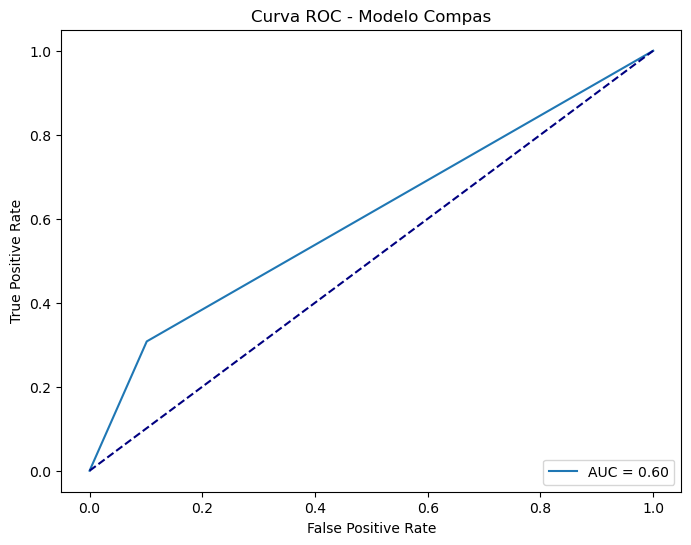

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, classification_report

# Definir las variables
y_true = df_compas_2y_clean['two_year_recid']  # Reincidencia real
y_pred = df_compas_2y_clean['high_risk']       # Predicción basada en Compas

# Evaluar el AUC
auc = roc_auc_score(y_true, y_pred)
print(f"AUC: {auc}")

# Reporte de clasificación
report = classification_report(y_true, y_pred)
print(report)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Modelo Compas')
plt.legend(loc="lower right")
plt.show()

## 5 Comparación de tasas de verdaderos positivos y falsos positivos entre diferentes grupos demográficos

In [28]:
# Calcular las tasas por grupo racial
racial_groups = ['race_African-American', 'race_Asian', 'race_Hispanic', 'race_Other', 'race_Native American', 'race_Caucasian']

for group in racial_groups:
    print(f"\nTasas para {group}:")
    
    # Filtrar por grupo racial
    group_data = df_compas_2y_clean[df_compas_2y_clean[group] == 1]
    
    # Definir la verdad y la predicción
    y_true_group = group_data['two_year_recid']
    y_pred_group = group_data['high_risk']
    
    # Reporte de clasificación
    report = classification_report(y_true_group, y_pred_group)
    print(report)


Tasas para race_African-American:
              precision    recall  f1-score   support

           0       0.57      0.84      0.68      1795
           1       0.72      0.39      0.51      1901

    accuracy                           0.61      3696
   macro avg       0.64      0.62      0.59      3696
weighted avg       0.65      0.61      0.59      3696


Tasas para race_Asian:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        23
           1       0.67      0.22      0.33         9

    accuracy                           0.75        32
   macro avg       0.71      0.59      0.59        32
weighted avg       0.73      0.75      0.70        32


Tasas para race_Hispanic:
              precision    recall  f1-score   support

           0       0.66      0.93      0.77       405
           1       0.57      0.16      0.25       232

    accuracy                           0.65       637
   macro avg       0.61      0.55      0.5

In [29]:
# Comparar las tasas de falsos y verdaderos positivos por género
for gender in ['sex_Male', 'sex_Female']:
    print(f"\nTasas para {gender}:")
    
    # Filtrar por género
    gender_data = df_compas_2y_clean[df_compas_2y_clean[gender] == 1]
    
    # Definir la verdad y la predicción
    y_true_gender = gender_data['two_year_recid']
    y_pred_gender = gender_data['high_risk']
    
    # Reporte de clasificación
    report = classification_report(y_true_gender, y_pred_gender)
    print(report)


Tasas para sex_Male:
              precision    recall  f1-score   support

           0       0.59      0.89      0.71      3066
           1       0.73      0.32      0.45      2753

    accuracy                           0.62      5819
   macro avg       0.66      0.61      0.58      5819
weighted avg       0.66      0.62      0.59      5819


Tasas para sex_Female:
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       897
           1       0.62      0.23      0.34       498

    accuracy                           0.67      1395
   macro avg       0.65      0.58      0.56      1395
weighted avg       0.66      0.67      0.63      1395



#### Matriz de Confusión General

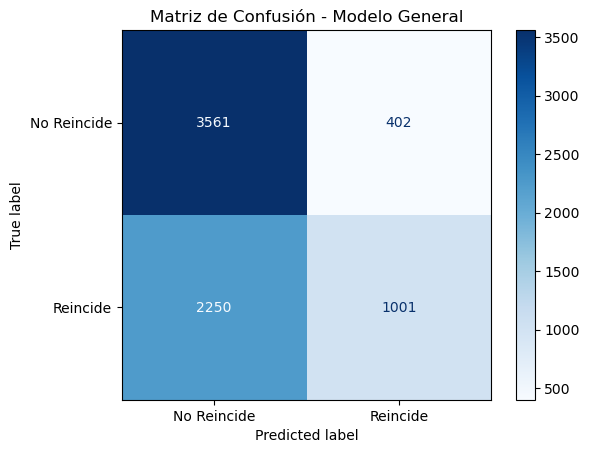

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Definir las variables
y_true = df_compas_2y_clean['two_year_recid']  # Reincidencia real
y_pred = df_compas_2y_clean['high_risk']       # Predicción basada en Compas

# Generar la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Reincide", "Reincide"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Modelo General")
plt.show()


#### Matriz de Confusión Por Grupo Racial


Matriz de Confusión para race_African-American:


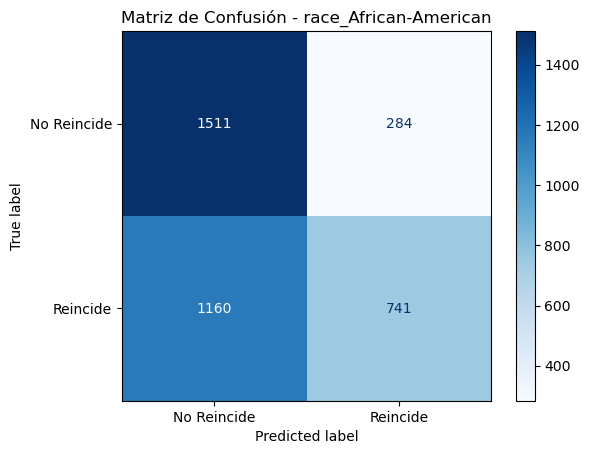


Matriz de Confusión para race_Asian:


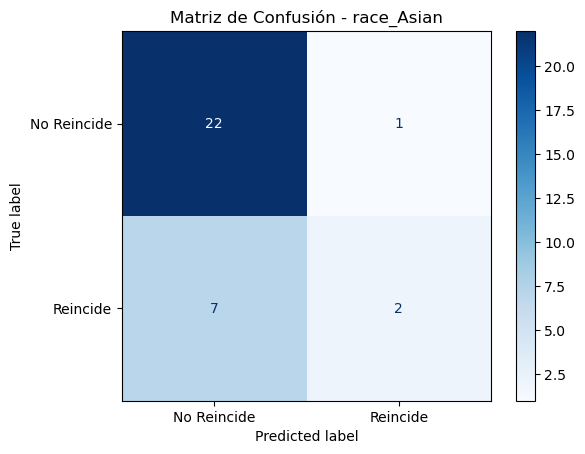


Matriz de Confusión para race_Hispanic:


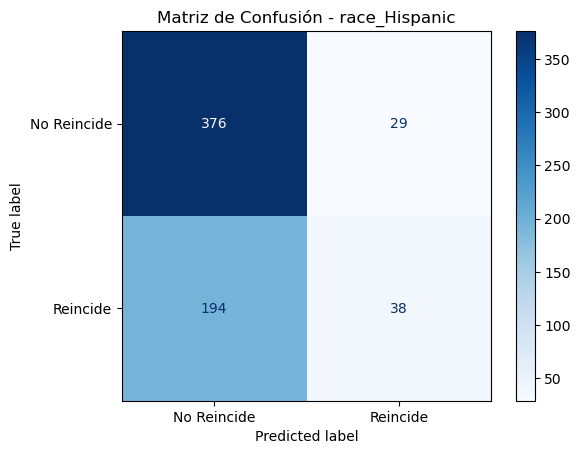


Matriz de Confusión para race_Other:


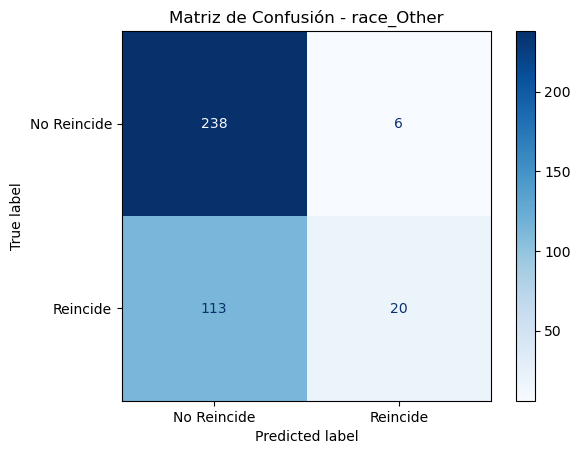


Matriz de Confusión para race_Native American:


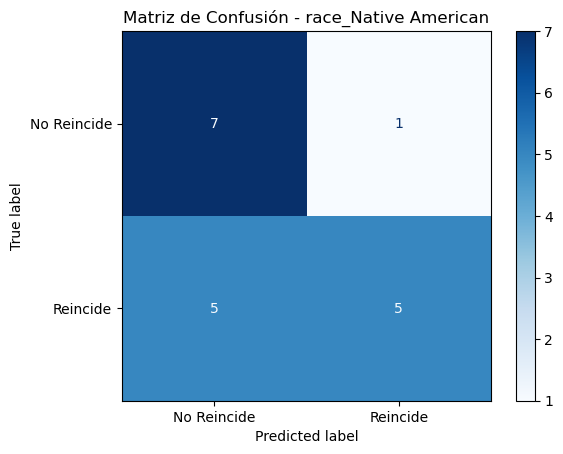


Matriz de Confusión para race_Caucasian:


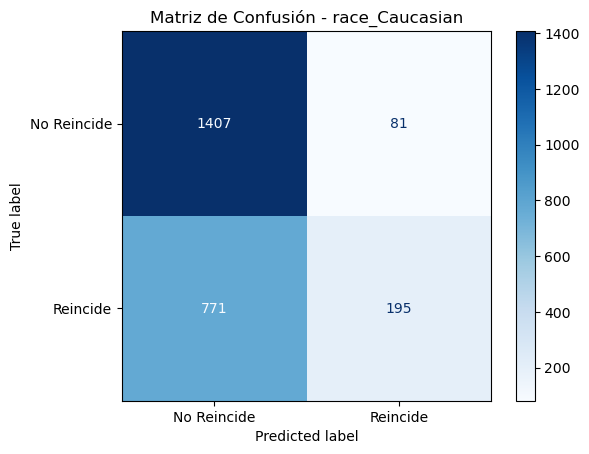

In [31]:
racial_groups = ['race_African-American', 'race_Asian', 'race_Hispanic', 'race_Other', 'race_Native American', 'race_Caucasian']

for group in racial_groups:
    print(f"\nMatriz de Confusión para {group}:")
    
    # Filtrar por grupo racial
    group_data = df_compas_2y_clean[df_compas_2y_clean[group] == 1]
    
    # Definir la verdad y la predicción
    y_true_group = group_data['two_year_recid']
    y_pred_group = group_data['high_risk']
    
    # Generar la matriz de confusión
    cm_group = confusion_matrix(y_true_group, y_pred_group)
    
    # Mostrar la matriz de confusión
    disp_group = ConfusionMatrixDisplay(confusion_matrix=cm_group, display_labels=["No Reincide", "Reincide"])
    disp_group.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión - {group}")
    plt.show()

#### Matriz de Confusión Por Género


Matriz de Confusión para sex_Male:


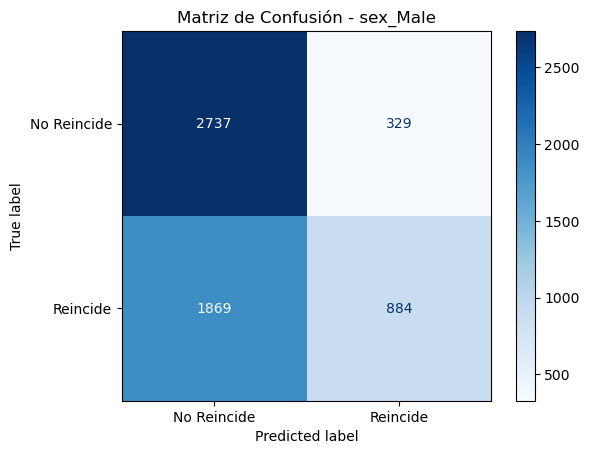


Matriz de Confusión para sex_Female:


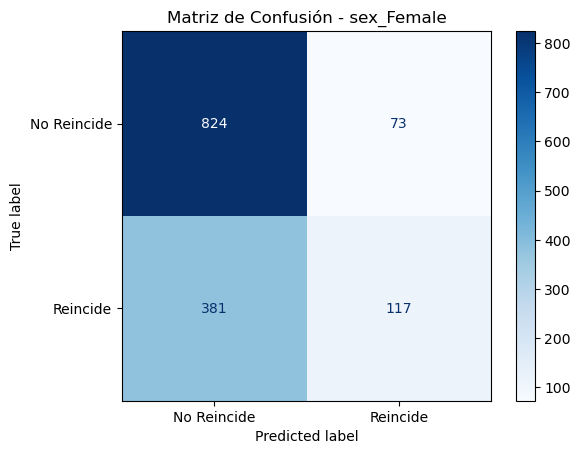

In [32]:
genders = ['sex_Male', 'sex_Female']

for gender in genders:
    print(f"\nMatriz de Confusión para {gender}:")
    
    # Filtrar por género
    gender_data = df_compas_2y_clean[df_compas_2y_clean[gender] == 1]
    
    # Definir la verdad y la predicción
    y_true_gender = gender_data['two_year_recid']
    y_pred_gender = gender_data['high_risk']
    
    # Generar la matriz de confusión
    cm_gender = confusion_matrix(y_true_gender, y_pred_gender)
    
    # Mostrar la matriz de confusión
    disp_gender = ConfusionMatrixDisplay(confusion_matrix=cm_gender, display_labels=["No Reincide", "Reincide"])
    disp_gender.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión - {gender}")
    plt.show()

## 6 Resultados de los KPIs:

1. KPIs Generales:

Precisión (Precision): 0.61
Recall (Sensibilidad): 0.31
F1-Score: 0.43

Estos resultados indican que:

El modelo predice correctamente el riesgo de reincidencia para el 61% de las personas predichas como de alto riesgo (Precisión).

El modelo captura correctamente al 31% de los reincidentes (Recall), lo que indica que tiene dificultades significativas para identificar correctamente a quienes reinciden.

El F1-Score de 0.43 muestra un equilibrio bajo entre precisión y recall, reflejando el bajo recall y un rendimiento moderado en general.

2. KPIs por Grupo Racial:

Afroamericanos:
Precisión: 0.72
Recall: 0.39
F1-Score: 0.51

El modelo predice el riesgo de reincidencia mejor para los afroamericanos, con una precisión razonablemente alta. Sin embargo, el recall es bajo, lo que significa que deja fuera a muchas personas que realmente reinciden.

Asiáticos:

Precisión: 0.67
Recall: 0.22
F1-Score: 0.33

Aunque la precisión es relativamente buena, el recall es muy bajo, lo que indica que el modelo tiene problemas significativos para identificar correctamente a los reincidentes en este grupo.

Hispanos:

Precisión: 0.57
Recall: 0.16
F1-Score: 0.25
El modelo tiene problemas graves para identificar a los reincidentes en este grupo, como se evidencia por el bajo recall. El F1-Score de 0.25 refleja un desequilibrio considerable entre precisión y recall.

Otras Razas:

Precisión: 0.77
Recall: 0.15
F1-Score: 0.25
El modelo tiene un recall muy bajo en este grupo, lo que significa que la mayoría de los reincidentes no son correctamente identificados. El F1-Score de 0.25 indica un rendimiento pobre.

Nativos Americanos:

Precisión: 0.83
Recall: 0.50
F1-Score: 0.62

El modelo es moderadamente eficaz en este grupo, con un buen equilibrio entre precisión y recall, aunque la muestra de datos es pequeña, lo que limita la confiabilidad del análisis.

Caucásicos:

Precisión: 0.71
Recall: 0.20
F1-Score: 0.31

Aunque la precisión es aceptable, el recall es muy bajo, lo que indica que el modelo tiene problemas para identificar correctamente a los reincidentes caucásicos.

3. KPIs por Género:

Hombres:

Precisión: 0.73
Recall: 0.32
F1-Score: 0.45

El modelo tiene un buen equilibrio entre precisión y recall para hombres, aunque la sensibilidad es baja, lo que sugiere que el modelo subestima el riesgo de reincidencia en una gran cantidad de hombres.

Mujeres:

Precisión: 0.62
Recall: 0.23
F1-Score: 0.34

El modelo tiene dificultades para predecir la reincidencia en mujeres, como lo muestra el bajo recall y un F1-Score de 0.34, lo que indica un rendimiento significativamente inferior al de los hombres.

Conclusiones:

General:

El modelo de Compas tiene un rendimiento moderado con un F1-Score de 0.43 en general, lo que indica que el modelo es mejor prediciendo quién no reincide que identificando a quienes realmente reinciden.

Afroamericanos y Nativos Americanos:

Estos grupos tienen un rendimiento relativamente mejor, con mejores valores de precisión. Sin embargo, el bajo recall en afroamericanos sugiere que el modelo subestima el riesgo en muchos reincidentes.

Hispanos, Asiáticos y Otras Razas:

El modelo tiene grandes dificultades para identificar correctamente a los reincidentes en estos grupos, como se refleja en los bajos valores de recall y F1-Score. Esto indica que el modelo está sesgado y tiene un rendimiento desigual entre los diferentes grupos raciales.

Género:

El modelo funciona mejor para los hombres que para las mujeres. Aunque el recall es bajo en ambos géneros, el rendimiento del modelo para mujeres es significativamente peor en términos de sensibilidad, lo que sugiere que el modelo podría estar subestimando el riesgo de reincidencia en mujeres.

Sugerencias:

Se podría considerar un ajuste del modelo para mejorar el recall en todos los grupos, especialmente en mujeres, hispanos, asiáticos y otras razas, donde el modelo actualmente falla en capturar a los reincidentes.

También sería valioso explorar más a fondo los sesgos en el modelo y evaluar cómo se puede mejorar el rendimiento en grupos raciales minoritarios y género.

Este análisis refleja cómo el modelo de Compas en el punto de corte 7, aunque preciso en algunos aspectos, tiene importantes desequilibrios en cuanto a su capacidad de identificar correctamente a los reincidentes, y varía mucho entre grupos demográficos.

## 7 Comparación con punto de corte de 5 para alto riesgo

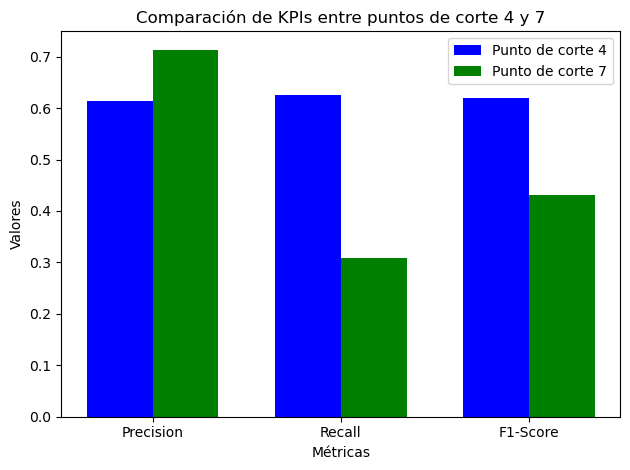

KPIs para punto de corte >4: {'Precision': 0.6135061802833887, 'Recall': 0.6259612426945556, 'F1-Score': 0.6196711327649209}
KPIs para punto de corte >7: {'Precision': 0.7134711332858161, 'Recall': 0.3079052599200246, 'F1-Score': 0.4301675977653631}


In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Cambiar el punto de corte a 4 y 7 para redefinir el alto riesgo
df_compas_2y_clean['high_risk_4'] = (df_compas_2y_clean['decile_score'] > 4).astype(int)
df_compas_2y_clean['high_risk_7'] = (df_compas_2y_clean['decile_score'] > 7).astype(int)

# Calcular KPIs con el nuevo punto de corte 4
y_true_4 = df_compas_2y_clean['two_year_recid']  # Reincidencia real
y_pred_4 = df_compas_2y_clean['high_risk_4']     # Predicción basada en Compas con punto de corte en 4
precision_general_4 = precision_score(y_true_4, y_pred_4)
recall_general_4 = recall_score(y_true_4, y_pred_4)
f1_general_4 = f1_score(y_true_4, y_pred_4)

# Calcular KPIs con el nuevo punto de corte 7
y_true_7 = df_compas_2y_clean['two_year_recid']  # Reincidencia real
y_pred_7 = df_compas_2y_clean['high_risk_7']     # Predicción basada en Compas con punto de corte en 7
precision_general_7 = precision_score(y_true_7, y_pred_7)
recall_general_7 = recall_score(y_true_7, y_pred_7)
f1_general_7 = f1_score(y_true_7, y_pred_7)

# KPIs calculados para el punto de corte 4
kpis_general_4 = {
    "Precision": precision_general_4,
    "Recall": recall_general_4,
    "F1-Score": f1_general_4
}

# KPIs calculados para el punto de corte 7
kpis_general_7 = {
    "Precision": precision_general_7,
    "Recall": recall_general_7,
    "F1-Score": f1_general_7
}

# Comparar KPIs entre puntos de corte 4 y 7
values_4 = [precision_general_4, recall_general_4, f1_general_4]
values_7 = [precision_general_7, recall_general_7, f1_general_7]

# Crear el gráfico comparativo para los puntos de corte 4 y 7
fig, ax = plt.subplots()

bar_width = 0.35
index = np.arange(3)

# Barras para el punto de corte 4
bars_4 = ax.bar(index, values_4, bar_width, label='Punto de corte 4', color='blue')

# Barras para el punto de corte 7
bars_7 = ax.bar(index + bar_width, values_7, bar_width, label='Punto de corte 7', color='green')

# Añadir etiquetas y título
ax.set_xlabel('Métricas')
ax.set_ylabel('Valores')
ax.set_title('Comparación de KPIs entre puntos de corte 4 y 7')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(["Precision", "Recall", "F1-Score"])
ax.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()

# Mostrar KPIs para puntos de corte 4 y 7
print("KPIs para punto de corte >4:", kpis_general_4)
print("KPIs para punto de corte >7:", kpis_general_7)


### Interpretación y Conclusiones Comparativa Matriz de Confusión
Interpretación y Conclusiones para los Puntos de Corte 4 y 7:

1. Punto de Corte >4:

Precisión (Precision): 0.613

Esto indica que el modelo predice correctamente el riesgo de reincidencia para el 61.3% de las personas que predice como de alto riesgo. En otras palabras, cuando el modelo clasifica a alguien como de alto riesgo con este punto de corte, es correcto el 61.3% de las veces.

Recall (Sensibilidad): 0.626

El recall muestra que el modelo identifica correctamente al 62.6% de los reincidentes. Este valor refleja que el modelo es razonablemente eficaz al capturar a los reincidentes cuando utiliza un punto de corte más bajo.

F1-Score: 0.620

El F1-Score de 0.620 muestra un buen equilibrio entre precisión y recall. Esto indica que el modelo mantiene un balance adecuado entre predecir correctamente a los reincidentes y no sobreclasificar a personas como de alto riesgo que no reinciden.

2. Punto de Corte >7:

Precisión (Precision): 0.713

Con el punto de corte 7, la precisión es significativamente más alta (71.3%). Esto significa que cuando el modelo clasifica a alguien como de alto riesgo, es más probable que esa persona reincida en comparación con el corte 4. El modelo es más conservador y, por tanto, más preciso al identificar a las personas como de alto riesgo.

Recall (Sensibilidad): 0.308

El recall es notablemente más bajo en este caso (30.8%). Esto significa que el modelo no captura a la mayoría de los reincidentes con este corte, ya que clasifica a menos personas como de alto riesgo. Esto sugiere que el modelo subestima el riesgo de reincidencia para muchas personas con este punto de corte más estricto.

F1-Score: 0.430

El F1-Score de 0.430 refleja que el equilibrio entre precisión y recall es mucho peor en comparación con el punto de corte 4. La alta precisión no compensa el hecho de que el modelo falla en capturar a una gran cantidad de reincidentes.

Conclusión Comparativa:

Punto de Corte 4:

Mejor recall (0.626) indica que el modelo es más eficaz en capturar a los reincidentes, clasificando a más personas como de alto riesgo. Sin embargo, la precisión es moderada (0.613), lo que significa que hay más falsos positivos (personas clasificadas como de alto riesgo que no reinciden).

F1-Score de 0.620 muestra que este punto de corte ofrece un mejor equilibrio entre identificar correctamente a los reincidentes y evitar sobreclasificaciones de alto riesgo.

Punto de Corte 7:

Mejor precisión (0.713) indica que el modelo es más conservador y menos propenso a clasificar incorrectamente a personas como de alto riesgo cuando no lo son. Esto es útil en escenarios donde es crucial evitar los falsos positivos.

Peor recall (0.308) significa que el modelo está dejando fuera a muchos reincidentes (más falsos negativos). El F1-Score más bajo (0.430) muestra que este corte no equilibra bien precisión y recall.

Recomendaciones:

Punto de corte 4 es más apropiado si la prioridad es capturar la mayor cantidad de reincidentes. Esto es útil en contextos donde el objetivo es minimizar los falsos negativos (no dejar que los reincidentes pasen desapercibidos).

Punto de corte 7 es mejor si la prioridad es evitar falsos positivos, es decir, clasificar a menos personas como de alto riesgo, pero con una mayor seguridad de que quienes son clasificados como de alto riesgo realmente reinciden.

El punto de corte ideal dependerá del objetivo del sistema. Si se busca un mayor equilibrio entre precisión y recall, el corte 4 es más adecuado. Si, por el contrario, se prefiere maximizar la precisión y minimizar el riesgo de clasificar incorrectamente, el corte 7 es más conservador, pero con un menor recall.

### Comparativa de AUC ROC

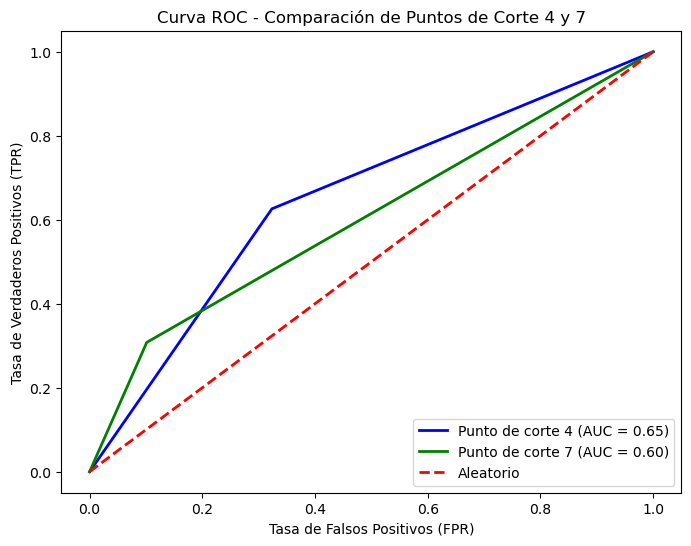

AUC para punto de corte 4: 0.65
AUC para punto de corte 7: 0.60


In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades predichas para ambos puntos de corte
y_prob_4 = df_compas_2y_clean['decile_score']
y_prob_7 = df_compas_2y_clean['decile_score']

# Calcular la curva ROC y el AUC para el punto de corte 4
fpr_4, tpr_4, _ = roc_curve(df_compas_2y_clean['two_year_recid'], y_prob_4 > 4)
roc_auc_4 = auc(fpr_4, tpr_4)

# Calcular la curva ROC y el AUC para el punto de corte 7
fpr_7, tpr_7, _ = roc_curve(df_compas_2y_clean['two_year_recid'], y_prob_7 > 7)
roc_auc_7 = auc(fpr_7, tpr_7)

# Crear el gráfico comparativo de las curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_4, tpr_4, color='blue', lw=2, label=f'Punto de corte 4 (AUC = {roc_auc_4:.2f})')
plt.plot(fpr_7, tpr_7, color='green', lw=2, label=f'Punto de corte 7 (AUC = {roc_auc_7:.2f})')

# Línea base de no discriminación
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Aleatorio')

# Etiquetas y título
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Comparación de Puntos de Corte 4 y 7')
plt.legend(loc="lower right")
plt.show()

# Mostrar AUC para ambos puntos de corte
print(f"AUC para punto de corte 4: {roc_auc_4:.2f}")
print(f"AUC para punto de corte 7: {roc_auc_7:.2f}")

Interpretación de los Resultados del AUC para los puntos de corte 4 y 7:
AUC para el punto de corte 4: 0.65

Un AUC de 0.65 indica que el modelo tiene una capacidad moderada para diferenciar entre reincidentes y no reincidentes con el punto de corte de 4. Esto significa que, en promedio, el modelo es capaz de clasificar correctamente a los reincidentes con una precisión razonable. Un AUC por encima de 0.6, aunque no excelente, indica que el modelo tiene un rendimiento aceptable, mejor que una clasificación aleatoria (AUC = 0.5), pero con margen de mejora.
AUC para el punto de corte 7: 0.60

Un AUC de 0.60 para el punto de corte de 7 muestra una ligeramente peor capacidad del modelo para distinguir entre reincidentes y no reincidentes en comparación con el punto de corte 4. Este valor está justo en el límite inferior de lo que se podría considerar un modelo útil. Aunque el modelo sigue funcionando mejor que uno aleatorio, tiene dificultades para hacer una distinción clara entre las dos clases.
Comparación entre ambos puntos de corte:
AUC para el corte 4 (0.65) es mejor que para el corte 7 (0.60), lo que indica que el modelo es más efectivo en la diferenciación entre reincidentes y no reincidentes cuando se usa un punto de corte más bajo.

Esto se alinea con el hecho de que el corte 4 tiene mejor recall: al clasificar a más personas como de alto riesgo, captura mejor a los reincidentes, aunque pueda tener más falsos positivos.
AUC para el corte 7 es menor, lo que sugiere que el modelo tiene más problemas para hacer predicciones precisas en este punto de corte. Esto puede deberse a que, con un corte más alto, el modelo se vuelve demasiado conservador, sacrificando la capacidad de identificar correctamente a los reincidentes.

Conclusión:
El punto de corte 4 es más efectivo para capturar reincidentes y ofrece un rendimiento global mejor que el punto de corte 7, según lo indicado por su AUC más alto.
El punto de corte 7, aunque mejora la precisión, disminuye su capacidad general para distinguir correctamente entre reincidentes y no reincidentes, lo que se refleja en su menor AUC.
Esto indica que el punto de corte más bajo (4) es preferible si el objetivo es tener un mejor balance entre la identificación correcta de reincidentes y no reincidentes, mientras que el punto de corte 7, aunque más conservador, no mejora el desempeño global del modelo.